In [8]:
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False 

In [ ]:
# 서울에서 충청남도, 경상북도, 강원도로 이동한 인구 데이터만 선택해서 사용
df = pd.read_excel('./시도별 전출입 인구수.xlsx', header=0)
# NaN 데이터 처리 
# 서울에서 청청남도, 경상북도 강원도로 이동한 이구 데이터 추출 
# 년도가 string이므로 int로 변경
# 인덱스는 년도 
df.fillna(method='ffill')



In [ ]:
mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시') 
df_seoul = df[mask]
df_seoul = df_seoul.drop(['전출지별'], axis=1)
df_seoul.rename({'전입지별':'전입지'}, axis=1, inplace=True)
df_seoul.set_index('전입지', inplace=True)

# 서울에서 '충청남도','경상북도', '강원도', '전라남도'로 이동한 인구 데이터 값만 선택
col_years = list(map(str, range(1970, 2018)))
df_4 = df_seoul.loc[['충청남도','경상북도', '강원도', '전라남도'], col_years]

In [ ]:
# -*- coding: utf-8 -*-
2
​
3
# 라이브러리 불러오기
4
import pandas as pd
5
import matplotlib.pyplot as plt
6
​
7
# matplotlib 한글 폰트 오류 문제 해결
8
from matplotlib import font_manager, rc
9
font_path = "./malgun.ttf"   #폰트파일의 위치
10
font_name = font_manager.FontProperties(fname=font_path).get_name()
11
rc('font', family=font_name)
12
​
13
plt.style.use('ggplot')   # 스타일 서식 지정
14
plt.rcParams['axes.unicode_minus']=False   # 마이너스 부호 출력 설정
15
​
16
# Excel 데이터를 데이터프레임 변환 
17
df = pd.read_excel('./남북한발전전력량.xlsx', engine= 'openpyxl', convert_float=True)
18
df = df.loc[5:9]
19
df.drop('전력량 (억㎾h)', axis='columns', inplace=True)
20
df.set_index('발전 전력별', inplace=True)
21
df = df.T 
22
​
23
# 증감율(변동률) 계산
24
df = df.rename(columns={'합계':'총발전량'})
25
df['총발전량 - 1년'] = df['총발전량'].shift(1)
26
df['증감율'] = ((df['총발전량'] / df['총발전량 - 1년']) - 1) * 100      
27
​
28
# 2축 그래프 그리기
29
ax1 = df[['수력','화력']].plot(kind='bar', figsize=(20, 10), width=0.7, stacked=True)  
30
ax2 = ax1.twinx()
31
ax2.plot(df.index, df.증감율, ls='--', marker='o', markersize=20, 
32
         color='green', label='전년대비 증감율(%)')  
33
​
34
ax1.set_ylim(0, 500)
35
ax2.set_ylim(-50, 50)
36
​
37
ax1.set_xlabel('연도', size=20)
38
ax1.set_ylabel('발전량(억 KWh)')
39
ax2.set_ylabel('전년 대비 증감율(%)')
40
​
41
plt.title('북한 전력 발전량 (1990 ~ 2016)', size=30)
42
ax1.legend(loc='upper left')
43
​
44
plt.show()

In [ ]:
# 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt
​
# matplotlib 한글 폰트 오류 문제 해결
from matplotlib import font_manager, rc
font_path = "./malgun.ttf"   #폰트파일의 위치
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)
​
plt.style.use('ggplot')   # 스타일 서식 지정
plt.rcParams['axes.unicode_minus']=False   # 마이너스 부호 출력 설정
​
# Excel 데이터를 데이터프레임 변환 
df = pd.read_excel('./남북한발전전력량.xlsx', engine= 'openpyxl', convert_float=True)
df = df.loc[5:9]
df.drop('전력량 (억㎾h)', axis='columns', inplace=True)
df.set_index('발전 전력별', inplace=True)
df = df.T 
​
# 증감율(변동률) 계산
df = df.rename(columns={'합계':'총발전량'})
df['총발전량 - 1년'] = df['총발전량'].shift(1)
df['증감율'] = ((df['총발전량'] / df['총발전량 - 1년']) - 1) * 100      
​
# 2축 그래프 그리기
ax1 = df[['수력','화력']].plot(kind='bar', figsize=(20, 10), width=0.7, stacked=True)  
ax2 = ax1.twinx()
ax2.plot(df.index, df.증감율, ls='--', marker='o', markersize=20, 
         color='green', label='전년대비 증감율(%)')  
​
ax1.set_ylim(0, 500)
ax2.set_ylim(-50, 50)
​
ax1.set_xlabel('연도', size=20)
ax1.set_ylabel('발전량(억 KWh)')
ax2.set_ylabel('전년 대비 증감율(%)')
​
plt.title('북한 전력 발전량 (1990 ~ 2016)', size=30)
ax1.legend(loc='upper left')
​
plt.show()


In [ ]:
# 라이브러리 불러오기
import matplotlib.pyplot as plt
import seaborn as sns
 
# Seaborn 제공 데이터셋 가져오기
titanic = sns.load_dataset('titanic')
 
# 스타일 테마 설정 (5가지: darkgrid, whitegrid, dark, white, ticks)
sns.set_style('whitegrid')

# 그래프 객체 생성 (figure에 3개의 서브 플롯을 생성)
fig = plt.figure(figsize=(15, 5))   
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)
 
# x축, y축에 변수 할당
sns.barplot(x='sex', y='survived', data=titanic, ax=ax1) 

# x축, y축에 변수 할당하고 hue 옵션 추가 
sns.barplot(x='sex', y='survived', hue='class', data=titanic, ax=ax2) 

# x축, y축에 변수 할당하고 hue 옵션을 추가하여 누적 출력
sns.barplot(x='sex', y='survived', hue='class', dodge=False, data=titanic, ax=ax3)       

# 차트 제목 표시
ax1.set_title('titanic survived - sex')
ax2.set_title('titanic survived - sex/class')
ax3.set_title('titanic survived - sex/class(stacked)')

plt.show()

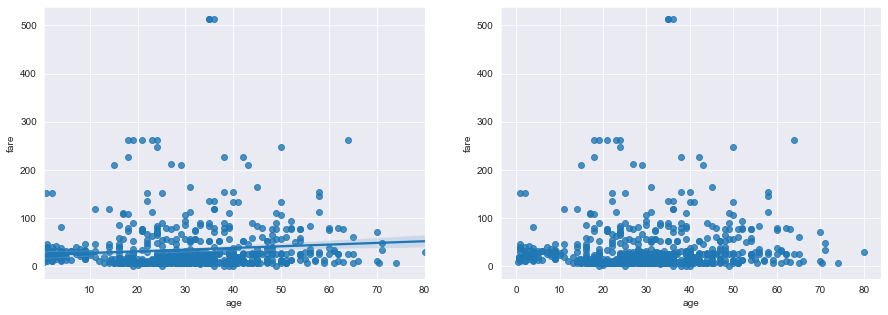

In [2]:
import seaborn as sns
 
# Seaborn 제공 데이터셋 가져오기
titanic = sns.load_dataset('titanic')
 
# 스타일 테마 설정 (5가지: darkgrid, whitegrid, dark, white, ticks)
sns.set_style('darkgrid')

# 그래프 객체 생성 (figure에 2개의 서브 플롯을 생성)
fig = plt.figure(figsize=(15, 5))   
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
 
# 그래프 그리기 - 선형회귀선 표시(fit_reg=True)
sns.regplot(x='age',        #x축 변수
            y='fare',       #y축 변수
            data=titanic,   #데이터
            ax=ax1)         #axe 객체 - 1번째 그래프 

# 그래프 그리기 - 선형회귀선 미표시(fit_reg=False)
sns.regplot(x='age',        #x축 변수
            y='fare',       #y축 변수
            data=titanic,   #데이터
            ax=ax2,         #axe 객체 - 2번째 그래프        
            fit_reg=False)  #회귀선 미표시

plt.show()

In [3]:
import folium

In [5]:
# 서울 지도 만들기 
seoul_map = folium.Map(location=[37.55, 126.98], zoom_start=12)

# 지도를 HTML 파일로 저장하기
seoul_map.save('seoul_1.html')

In [6]:
import seaborn as sns

iris = sns.load_dataset('iris')
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


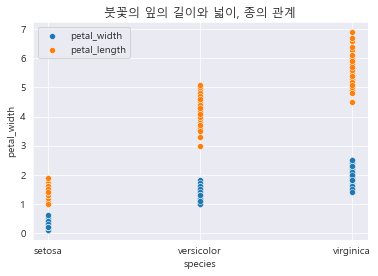

In [9]:
def scatter_graph(X, Y) :
    sns.scatterplot(x=X, y=Y)
    
iris = sns.load_dataset('iris')
iris.set_index('species', inplace=True)

x_data = iris.index
y_data = iris['petal_width']
scatter_graph(x_data, y_data) # 입의 넓이를 산점도로

y_data = iris['petal_length'] # 잎의 길이를 산점도로
scatter_graph(x_data, y_data)

plt.title('붓꽃의 잎의 길이와 넓이, 종의 관계')  # title
labels = iris[['petal_width', 'petal_length']]
plt.legend(labels)   # 범주
plt.show()